# FEATURE ENGINEERING OPERATIONS - {"BLACK FRIDAY SALES" DATASET}

## 1. Importing Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PowerTransformer, FunctionTransformer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import SelectKBest, mutual_info_regression

from sklearn.pipeline import Pipeline

In [2]:
# PD Options

pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 4)

In [3]:
# SB Options

sb.set_theme(context='notebook', style='whitegrid', palette='pastel', font='times new roman', font_scale=1.25)

## 2. Importing Dataset

### 2.1 Train Dataset

In [4]:
tr = pd.read_pickle('bfs_train_pp.pkl')

print(f'Shape of the train dataset : {tr.shape}')
tr.head(5)

Shape of the train dataset : (549868, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
94454,1002589,P00296042,M,26-35,0,C,3,0,8,13,16,5820
6914,1001101,P00251842,M,36-45,1,A,1,0,1,15,16,11715
167574,1001861,P00154642,M,51-55,16,A,1,1,8,14,17,8075
323135,1001746,P00251842,M,26-35,4,C,1,1,1,15,16,4336
31253,1004786,P00025942,M,46-50,6,B,1,1,8,14,17,10057


In [5]:
Xtr = tr.drop(columns='Purchase')

## 3. Feature Engineering Process

### 3.1 Target Variable Transformation

In [6]:
print(f"Skew of Target Feature : {tr['Purchase'].skew():0.4f}")
tr['Purchase'].describe()

Skew of Target Feature : 0.6001


count    549868.0000
mean       9263.9454
std        5023.0486
min          12.0000
25%        5823.0000
50%        8047.0000
75%       12054.0000
max       23961.0000
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Density'>

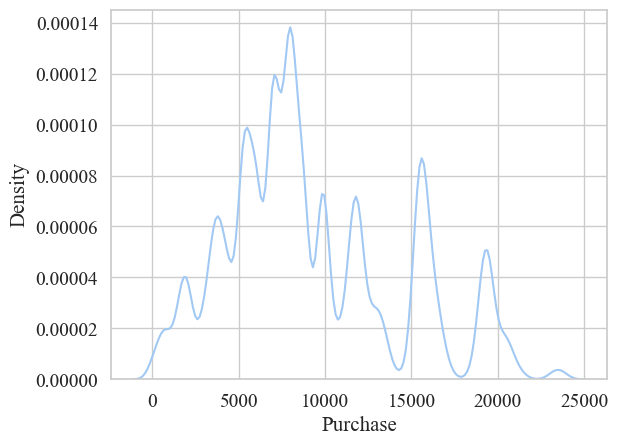

In [7]:
sb.kdeplot(tr, x='Purchase')

Transformed "Purchase" feature values: 
94454    -0.6056
6914      0.5769
167574   -0.1090
323135   -0.9810
31253     0.2784
Name: ptpur, dtype: float64

 Skew of the original and transformed values : 
Purchase    0.6001
ptpur      -0.0297
dtype: float64

 Original, Transformed, and Inverse Transformed values: 
        Purchase   ptpur   ptipur
94454       5820 -0.6056   5820.0
6914       11715  0.5769  11715.0
167574      8075 -0.1090   8075.0
323135      4336 -0.9810   4336.0
31253      10057  0.2784  10057.0


<Axes: xlabel='ptpur', ylabel='Density'>

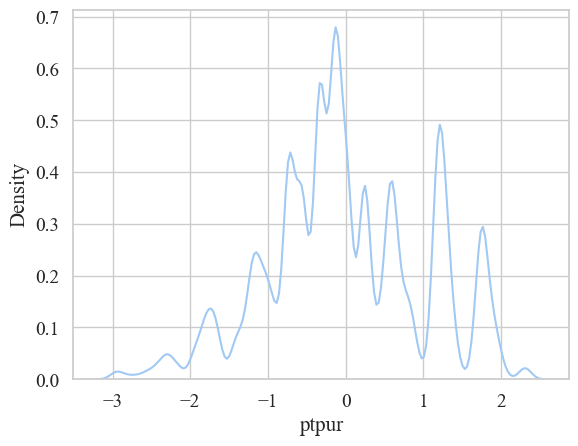

In [8]:
pt = PowerTransformer()
tr['ptpur'] = pt.fit_transform(tr['Purchase'].values.reshape(-1,1))
print(f'Transformed "Purchase" feature values: ')
print(tr['ptpur'].head())

print(f'\n Skew of the original and transformed values : ')
print(tr[['Purchase','ptpur']].skew())

tr['ptipur'] = pt.inverse_transform(tr['ptpur'].values.reshape(-1,1))
print(f'\n Original, Transformed, and Inverse Transformed values: ')
print(tr[['Purchase','ptpur','ptipur']].head())
sb.kdeplot(tr, x='ptpur')

In [9]:
ytr = tr['ptpur'].values
ytr[:1]

array([-0.6056246])

### 3.2 Categorical Feature Transformation
#### 1. Feature Removal
#### 2. Ordinal Encoding
#### 3. OneHot Encoding

In [10]:
def rem_cols(ds):
    cols = ['User_ID','Product_ID']
    ds = ds.drop(columns=cols)
    
    return ds

In [11]:
Xtr.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
94454,1002589,P00296042,M,26-35,0,C,3,0,8,13,16
6914,1001101,P00251842,M,36-45,1,A,1,0,1,15,16
167574,1001861,P00154642,M,51-55,16,A,1,1,8,14,17
323135,1001746,P00251842,M,26-35,4,C,1,1,1,15,16
31253,1004786,P00025942,M,46-50,6,B,1,1,8,14,17


In [12]:
pre_proc_cat = ColumnTransformer(transformers=[
                ('ft',FunctionTransformer(rem_cols),[0,1]),
                ('oe',OrdinalEncoder(categories=[['0-17','18-25','26-35','36-45','46-50','51-55','55+'],
                                ['A','B','C'],
                                ['0','1','2','3','4+']],dtype='int'),[3,5,6]),
                ('ohe',OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False, dtype='int8'),[2,4,7,8,9,10]),
                ],
                remainder='passthrough')

In [13]:
res_cat = pre_proc_cat.fit_transform(Xtr)
print(res_cat.shape)
res_cat[:1]

(549868, 74)


array([[2., 2., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

### 3.3 Feature Selection

In [14]:
# fea_select = SelectKBest(mutual_info_regression, k=10)
# Xtr_trans = fea_select.fit_transform(res_cat, ytr)

# print(Xtr_trans.shape)
# Xtr_trans[:1]